In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Hamoye/Team_algorithm/cve_merged.csv")
df.head()

,cve_id,mod_date,pub_date,cvss,cwe_code,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity,vendor,vulnerable_product,Pub_Year,Mod_Year,Qualitative_cvss
0,CVE-2019-2211,2019-11-14 21:36:00,2019-11-13 18:15:00,7.8,89,Improper Neutralization of Special Elements u...,In createProjectionMapForQuery of TvProvider.j...,NONE,LOW,NETWORK,NONE,COMPLETE,NONE,google,android,2019,2019,High
1,CVE-2019-2212,2019-11-14 21:30:00,2019-11-13 18:15:00,4.9,200,Information Exposure,"In poisson_distribution of random, there is an...",NONE,LOW,LOCAL,NONE,COMPLETE,NONE,google,android,2019,2019,Medium
2,CVE-2019-2213,2019-11-14 21:24:00,2019-11-13 18:15:00,6.9,416,Use After Free,"In binder_free_transaction of binder.c, there ...",NONE,MEDIUM,LOCAL,COMPLETE,COMPLETE,COMPLETE,google,android,2019,2019,Medium
3,CVE-2019-2214,2019-11-14 21:19:00,2019-11-13 18:15:00,7.2,269,Improper Privilege Management,"In binder_transaction of binder.c, there is a ...",NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE,google,android,2019,2019,High
4,CVE-2019-18793,2019-11-14 21:14:00,2019-11-13 20:15:00,4.3,79,Improper Neutralization of Input During Web P...,Parallels Plesk Panel 9.5 allows XSS in target...,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL,parallels,parallels_plesk_panel,2019,2019,Medium


In [ ]:
df.isnull().sum()

cve_id                    0
mod_date                  0
pub_date                  0
cvss                      0
cwe_code                  0
cwe_name                  0
summary                   0
access_authentication     0
access_complexity         0
access_vector             0
impact_availability       0
impact_confidentiality    0
impact_integrity          0
vendor                    0
vulnerable_product        0
Pub_Year                  0
Mod_Year                  0
Qualitative_cvss          0
dtype: int64

In [ ]:
df.shape

(88776, 13)

In [5]:
selected_columns = df.columns[5:13]
df = df.loc[:,selected_columns]
df.head()

,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,Improper Neutralization of Special Elements u...,In createProjectionMapForQuery of TvProvider.j...,NONE,LOW,NETWORK,NONE,COMPLETE,NONE
1,Information Exposure,"In poisson_distribution of random, there is an...",NONE,LOW,LOCAL,NONE,COMPLETE,NONE
2,Use After Free,"In binder_free_transaction of binder.c, there ...",NONE,MEDIUM,LOCAL,COMPLETE,COMPLETE,COMPLETE
3,Improper Privilege Management,"In binder_transaction of binder.c, there is a ...",NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE
4,Improper Neutralization of Input During Web P...,Parallels Plesk Panel 9.5 allows XSS in target...,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL


In [6]:
df.drop_duplicates(keep=False, inplace=True)

In [7]:
df.reset_index(inplace=True,drop=True)

In [8]:
df["summary"] = df["summary"].apply(lambda x : x.replace("_"," "))

In [9]:
df["summary"][1]

'In poisson distribution of random, there is an out of bounds read. This could lead to local information disclosure with no additional execution privileges needed. User interaction is not needed for exploitation.Product: AndroidVersions: Android-8.0 Android-8.1 Android-9 Android-10Android ID: A-139690488'

In [ ]:
df.shape

(86168, 8)

In [10]:
def join_text(cols):
     cwe = cols[0]
     summary = cols[1]
     return cwe + " " + summary
df["cwe_summary"] =  df[["cwe_name","summary"]].apply(join_text,axis=1)

In [ ]:
df.head()

,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity,cwe_summary
0,Improper Neutralization of Special Elements u...,In createProjectionMapForQuery of TvProvider.j...,NONE,LOW,NETWORK,NONE,COMPLETE,NONE,Improper Neutralization of Special Elements u...
1,Information Exposure,"In poisson_distribution of random, there is an...",NONE,LOW,LOCAL,NONE,COMPLETE,NONE,Information Exposure In poisson_distribution ...
2,Use After Free,"In binder_free_transaction of binder.c, there ...",NONE,MEDIUM,LOCAL,COMPLETE,COMPLETE,COMPLETE,Use After Free In binder_free_transaction of ...
3,Improper Privilege Management,"In binder_transaction of binder.c, there is a ...",NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE,Improper Privilege Management In binder_trans...
4,Improper Neutralization of Input During Web P...,Parallels Plesk Panel 9.5 allows XSS in target...,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL,Improper Neutralization of Input During Web P...


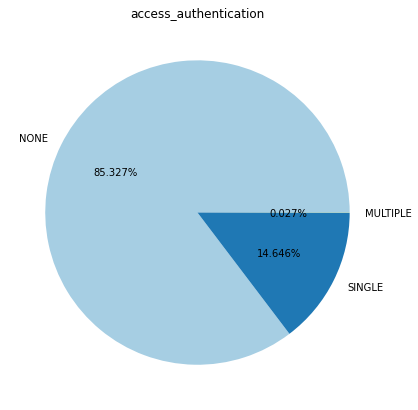

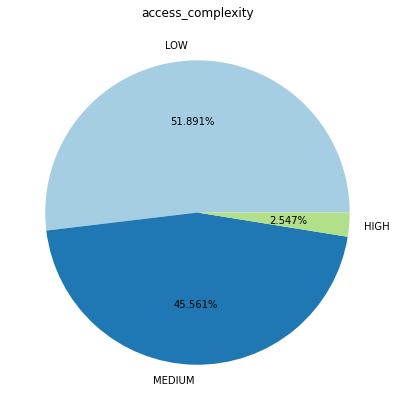

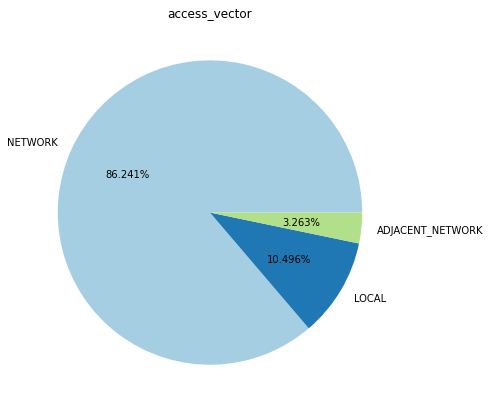

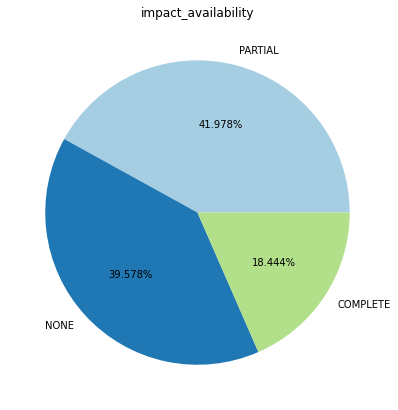

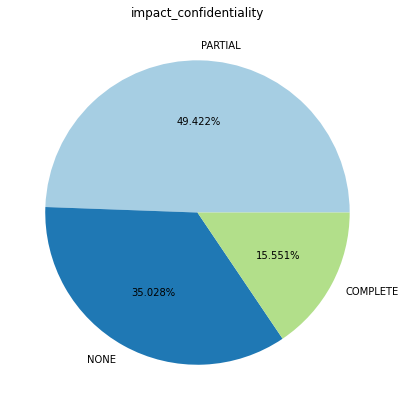

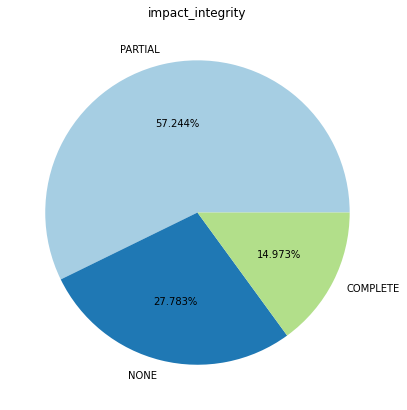

In [11]:
#Plot distribution of target column
target_cols = ['access_authentication', 'access_complexity','access_vector', 'impact_availability', 'impact_confidentiality','impact_integrity']
for feature in target_cols:
    plt.figure(figsize=(10,7))
    data =df[feature].value_counts().values
    labels = df[feature].value_counts().index

    #Read in Seaborn color palette
    plt.title(feature)
    colors = sns.color_palette('Paired')[0:4]

    #Create pie chart with Matplotlib
    plt.pie(data, labels = labels, colors = colors, autopct='%1.3f%%')
    plt.show()

## Text Cleaning and preprocessing

Text will be preprocessed, the summary of the vulnerability will be picked as the input vector for now

In [12]:
#Disaply Random texts
for i in range(1,21):
    print(i,":",df["summary"].loc[i])
    print()

KeyError: ignored

In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [16]:

from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [17]:
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['summary'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus 

['createprojectionmapforquery tvprovider java possible sql injection could lead local information disclosure additional execution privilege needed user interaction needed exploitation product androidversions android android android android android id',
 'poisson distribution random bound read could lead local information disclosure additional execution privilege needed user interaction needed exploitation product androidversions android android android android android id',
 'binder free transaction binder c possible use free due race condition could lead local escalation privilege additional execution privilege needed user interaction needed exploitation product androidversions android kernelandroid id reference upstream kernel',
 'binder transaction binder c possible bound write due missing bound check could lead local escalation privilege additional execution privilege needed user interaction needed exploitation product androidversions android kernelandroid id reference upstream kern

In [ ]:
len(corpus)

86168

In [ ]:
#get maximum snetence lenght in corpuss
all_lenght = []
for i in corpus:
  array_i = i.split(" ")
  lenght = len(array_i)
  all_lenght.append(lenght)
print(all_lenght)

[27, 26, 32, 32, 15, 15, 15, 10, 14, 15, 10, 17, 11, 8, 9, 4, 3, 3, 40, 25, 18, 17, 162, 16, 9, 24, 26, 22, 23, 23, 26, 21, 25, 35, 6, 29, 39, 19, 12, 23, 20, 23, 15, 15, 47, 8, 26, 29, 22, 22, 49, 9, 27, 7, 38, 26, 9, 37, 30, 12, 6, 12, 106, 167, 71, 146, 91, 7, 13, 38, 11, 24, 32, 23, 26, 23, 24, 26, 37, 14, 27, 7, 25, 10, 9, 8, 25, 6, 23, 27, 9, 27, 27, 27, 22, 22, 22, 22, 27, 27, 20, 37, 7, 21, 56, 40, 53, 23, 39, 6, 37, 27, 43, 22, 21, 10, 8, 13, 25, 27, 10, 27, 27, 9, 27, 6, 14, 27, 15, 32, 47, 25, 26, 16, 11, 24, 25, 21, 34, 32, 29, 49, 46, 64, 26, 44, 24, 12, 27, 42, 49, 38, 46, 17, 28, 28, 27, 26, 22, 20, 24, 17, 25, 7, 10, 40, 19, 31, 34, 18, 19, 19, 18, 8, 24, 11, 28, 23, 13, 24, 18, 18, 19, 23, 8, 6, 9, 13, 9, 7, 28, 8, 47, 12, 10, 14, 15, 43, 7, 18, 26, 11, 10, 35, 21, 27, 19, 86, 101, 18, 10, 8, 8, 11, 16, 83, 26, 64, 53, 6, 46, 16, 24, 17, 17, 12, 50, 22, 16, 9, 27, 38, 67, 41, 13, 37, 38, 46, 50, 9, 49, 8, 9, 10, 7, 6, 5, 6, 11, 19, 8, 5, 5, 25, 24, 27, 29, 34, 10, 7, 8

In [ ]:
#Print mean lenght of sentences
np.mean(all_lenght)

28.610481849410455

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Bidirectional
from tensorflow.keras.layers import Dense
from keras import Input
from keras import layers
from keras.models import Model

In [19]:
### Vocabulary size
voc_size=60000

In [20]:
#Convert list to  string
def listToString(s):
   
    # initialize an empty string
    str1 = " "
   
    # return string 
    return (str1.join(s))
       
       
# Driver code   

corpus_string = listToString(corpus)


In [ ]:
len(corpus_string)

2465308

In [21]:
#One hot
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [22]:
len(onehot_repr)

65637

**Embedding representation**

In [23]:
sent_length=30
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[44504  6355 40547 ...     0     0     0]
 [ 8710 46171 41876 ...     0     0     0]
 [28389  3492 52717 ... 15006 36863 39793]
 ...
 [27708 52229 16004 ... 24097    63 33272]
 [15413 46744 29544 ... 33272     0     0]
 [33599 29844 25779 ...     0     0     0]]


In [24]:
embedded_docs[1]

array([ 8710, 46171, 41876,  1878, 25034, 11997,  3871, 20417, 39144,
       16820, 29366, 16313, 50974, 15678,  2576,  2075, 15678, 11507,
       41453, 34140, 16558, 16558, 16558, 16558, 16558, 16234,     0,
           0,     0,     0], dtype=int32)

In [25]:
#For a dictionary of target varibale with the unique values folliwng the exact order they will be one-hot encoded
target_dic = {}
cols = ['access_authentication', 'access_complexity','access_vector', 'impact_availability', 'impact_confidentiality', 'impact_integrity']
for feature in cols:
      test_values = pd.get_dummies(df[feature]).columns
        
      target_dic[feature] = test_values

In [ ]:
target_dic

{'access_authentication': Index(['MULTIPLE', 'NONE', 'SINGLE'], dtype='object'),
 'access_complexity': Index(['HIGH', 'LOW', 'MEDIUM'], dtype='object'),
 'access_vector': Index(['ADJACENT_NETWORK', 'LOCAL', 'NETWORK'], dtype='object'),
 'impact_availability': Index(['COMPLETE', 'NONE', 'PARTIAL'], dtype='object'),
 'impact_confidentiality': Index(['COMPLETE', 'NONE', 'PARTIAL'], dtype='object'),
 'impact_integrity': Index(['COMPLETE', 'NONE', 'PARTIAL'], dtype='object')}

In [26]:
#Create a mutil-output train and testing data
embedded_docs = pd.DataFrame(embedded_docs)
x_new = embedded_docs.copy()
y1 = df["access_authentication"]
y1 = pd.get_dummies(y1)


y2 = df["access_complexity"]
y2 = pd.get_dummies(y2)


y3 = df["access_vector"]
y3 = pd.get_dummies(y3)


y4 = df["impact_availability"]
y4 = pd.get_dummies(y4)


y5 = df["impact_confidentiality"]
y5 = pd.get_dummies(y5)


y6 = df["impact_integrity"]
y6 = pd.get_dummies(y6)
#y= df[['access_authentication','access_vector']]
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=5,random_state = 42,test_size=0.1)
#access_authentication
for train,test in splitter.split(x_new,y1):
      x_train = x_new.loc[train]
      y_train1 = y1.loc[train]
      x_test = x_new.loc[test] 
      y_test1 = y1.loc[test]
#access_complexity
for train,test in splitter.split(x_new,y2):
      x_train = x_new.loc[train]
      y_train2 = y2.loc[train]
      x_test = x_new.loc[test] 
      y_test2 = y2.loc[test]
#access_vector
for train,test in splitter.split(x_new,y3):
      x_train = x_new.loc[train]
      y_train3 = y3.loc[train]
      x_test = x_new.loc[test] 
      y_test3 = y3.loc[test]
#impact_availability
for train,test in splitter.split(x_new,y4):
      x_train = x_new.loc[train]
      y_train4 = y4.loc[train]
      x_test = x_new.loc[test] 
      y_test4 = y4.loc[test]
#impact_confidentiality
for train,test in splitter.split(x_new,y5):
      x_train = x_new.loc[train]
      y_train5 = y5.loc[train]
      x_test = x_new.loc[test] 
      y_test5 = y5.loc[test]
#impact_integrity
for train,test in splitter.split(x_new,y6):
      x_train = x_new.loc[train]
      y_train6 = y6.loc[train]
      x_test = x_new.loc[test] 
      y_test6 = y6.loc[test]

In [27]:
#Define f1_score function
import keras.backend as K
from keras.callbacks import Callback,ModelCheckpoint,EarlyStopping
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

**Building a custom traing function**

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
undersample = RandomUnderSampler(random_state=1)
#oversample = SMOTE()
sampler = SMOTE(random_state=1)
steps = [("o",sampler)]
pipeline = Pipeline(steps = steps)
x_train,y_train2 = pipeline.fit_resample(x_train.values,y_train2.values)

In [ ]:
len(x_train)

120675

In [ ]:
len(y_train2)

120675

In [ ]:
x_train

array([[51078, 41087, 43357, ...,     0,     0,     0],
       [34185, 51872, 38213, ...,     0,     0,     0],
       [47431, 17729, 16870, ...,     0,     0,     0],
       ...,
       [51872, 35399, 53934, ..., 25851,     0,     0],
       [ 3060, 28779, 50269, ..., 38884, 53551, 24907],
       [17313, 58623, 57689, ...,     0,     0,     0]], dtype=int32)

In [ ]:
y_train2

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
embedding_vector_features=100
model_2=Sequential()
model_2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model_2.add(LSTM(100))
model_2.add(Dense(3,activation='softmax'))
model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[get_f1])
print("Fitting access_complexity")
model_2_hostory = model_2.fit(x_train,y_train2,validation_data=(x_test,y_test2),epochs=10,batch_size=32,callbacks=es)
print("Finished")

Fitting access_complexity
Epoch 1/10
3772/3772 [==============================] - 34s 9ms/step - loss: 0.6682 - get_f1: 0.5864 - val_loss: 0.8089 - val_get_f1: 0.5160
Epoch 2/10
3772/3772 [==============================] - 32s 8ms/step - loss: 0.6138 - get_f1: 0.6138 - val_loss: 0.8112 - val_get_f1: 0.4708
Epoch 2: early stopping
Finished


**Custom Train function**

In [28]:
from keras import callbacks
## Creating model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
embedding_vector_features=100 ##features representation
def train_model(classifier):
      #Define access authenticarion model
      model_1=Sequential()
      model_1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
      model_1.add(classifier)
      model_1.add(Dense(3,activation='softmax'))
      model_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[get_f1])
      print("Fitting access_authentication model")
      model_1_hostory = model_1.fit(x_train,y_train1,validation_data=(x_test,y_test1),epochs=10,batch_size=32,callbacks=es)
      print("Finished")

      #Define access_complexity model
      model_2=Sequential()
      model_2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
      model_2.add(classifier)
      model_2.add(Dense(3,activation='softmax'))
      model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[get_f1])
      print("Fitting access_complexity")
      model_2_hostory = model_2.fit(x_train,y_train2,validation_data=(x_test,y_test2),epochs=10,batch_size=32,callbacks=es)
      print("Finished")

      #Define access_vector model
      model_3=Sequential()
      model_3.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
      model_3.add(classifier)
      model_3.add(Dense(3,activation='softmax'))
      model_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[get_f1])
      print("Fitting access_vector model")
      model_3_hostory = model_3.fit(x_train,y_train3,validation_data=(x_test,y_test3),epochs=10,batch_size=32,callbacks=es)
      print("Finished")

      #Define impact_availability model
      model_4=Sequential()
      model_4.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
      model_4.add(classifier)
      model_4.add(Dense(3,activation='softmax'))
      model_4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[get_f1])
      print("Fitting impact_availability model")
      model_4_hostory = model_4.fit(x_train,y_train4,validation_data=(x_test,y_test4),epochs=10,batch_size=32,callbacks=es)
      print("Finished")

      #Define impact_confidentiality model 
      model_5=Sequential()
      model_5.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
      model_5.add(classifier)
      model_5.add(Dense(3,activation='softmax'))
      model_5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[get_f1])
      print("Fitting impact_confidentiality model")
      model_5_hostory = model_5.fit(x_train,y_train5,validation_data=(x_test,y_test5),epochs=10,batch_size=32,callbacks=es)
      print("Finished")

      #Define impact_integrity
      model_6=Sequential()
      model_6.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
      model_6.add(classifier)
      model_6.add(Dense(3,activation='softmax'))
      model_6.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[get_f1])
      print("Fitting impact_confidentiality model")
      model_6_hostory = model_6.fit(x_train,y_train6,validation_data=(x_test,y_test6),epochs=10,batch_size=32,callbacks=es)
      print("Finished")
      return model_1,model_2,model_3,model_4,model_5,model_6
     

**Training with LSTM**

In [29]:
model_1,model_2,model_3,model_4,model_5,model_6 = train_model(LSTM(100))

Fitting access_authentication model
Epoch 1/10
1847/1847 [==============================] - 22s 9ms/step - loss: 0.4255 - get_f1: 0.8496 - val_loss: 0.4208 - val_get_f1: 0.8527
Epoch 2/10
1847/1847 [==============================] - 15s 8ms/step - loss: 0.4181 - get_f1: 0.8527 - val_loss: 0.4211 - val_get_f1: 0.8529
Epoch 2: early stopping
Finished
Fitting access_complexity
Epoch 1/10
1847/1847 [==============================] - 18s 9ms/step - loss: 0.7953 - get_f1: 0.4103 - val_loss: 0.7929 - val_get_f1: 0.5198
Epoch 2/10
1847/1847 [==============================] - 16s 9ms/step - loss: 0.7894 - get_f1: 0.4575 - val_loss: 0.7954 - val_get_f1: 0.4876
Epoch 2: early stopping
Finished
Fitting access_vector model
Epoch 1/10
1847/1847 [==============================] - 17s 9ms/step - loss: 0.4809 - get_f1: 0.8586 - val_loss: 0.4764 - val_get_f1: 0.8620
Epoch 2/10
1847/1847 [==============================] - 15s 8ms/step - loss: 0.4719 - get_f1: 0.8625 - val_loss: 0.4820 - val_get_f1: 0.862

**Traning with Bidirectional LSTM**

In [32]:
print("BIDRIECTIONAL LSTM")
model_1,model_2,model_3,model_4,model_5,model_6 = train_model(Bidirectional(LSTM(100)))

BIDRIECTIONAL LSTM
Fitting access_authentication model
Epoch 1/10
1847/1847 [==============================] - 24s 11ms/step - loss: 0.4260 - get_f1: 0.8495 - val_loss: 0.4195 - val_get_f1: 0.8529
Epoch 2/10
1847/1847 [==============================] - 20s 11ms/step - loss: 0.4085 - get_f1: 0.8533 - val_loss: 0.4306 - val_get_f1: 0.8529
Epoch 2: early stopping
Finished
Fitting access_complexity
Epoch 1/10
1847/1847 [==============================] - 24s 12ms/step - loss: 0.7958 - get_f1: 0.4381 - val_loss: 0.7918 - val_get_f1: 0.5061
Epoch 2/10
1847/1847 [==============================] - 20s 11ms/step - loss: 0.7687 - get_f1: 0.5439 - val_loss: 0.8152 - val_get_f1: 0.5010
Epoch 2: early stopping
Finished
Fitting access_vector model
Epoch 1/10
1847/1847 [==============================] - 25s 12ms/step - loss: 0.4822 - get_f1: 0.8584 - val_loss: 0.4763 - val_get_f1: 0.8620
Epoch 2/10
1847/1847 [==============================] - 20s 11ms/step - loss: 0.4553 - get_f1: 0.8624 - val_loss: 0